# Mini project 10.1.6

# Logistic Regression

### Step:  Set up

In [1]:
# Run some LaTex commands:

# $$
# \renewcommand{\like}{{\cal L}}
# \renewcommand{\loglike}{{\ell}}
# \renewcommand{\err}{{\cal E}}
# \renewcommand{\dat}{{\cal D}}
# \renewcommand{\hyp}{{\cal H}}
# \renewcommand{\Ex}[2]{E_{#1}[#2]}
# \renewcommand{\x}{{\mathbf x}}
# \renewcommand{\v}[1]{{\mathbf #1}}
# $$

In [2]:
# Import libraries

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.model_selection

In [3]:
# Run a magic command

# %matplotlib inline

Re this magic command:

* Sets the backend of matplotlib to the 'inline' backend
* With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it.  The resulting plots will then also be stored in the notebook document.

In [4]:
# Set default plot style to ggplot

plt.style.use('ggplot')

## Step:  Load data

In [5]:
dflog = pd.read_csv("data/01_heights_weights_genders.csv")

## Step:  Explore data

In [6]:
dflog.shape

(10000, 3)

In [7]:
dflog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [8]:
dflog.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [9]:
dflog.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


## Exercise I:  Inspect the data

#### Q:  Create a scatter plot of Weight vs. Height

Text(0.5, 1.1, 'Scatterplot of weight and height')

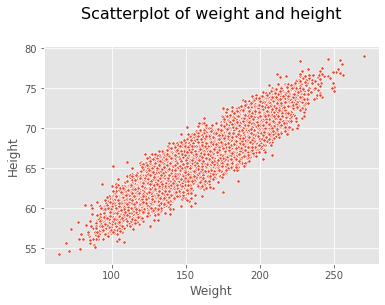

In [10]:
# Create scatterplot of weight and height

ax = sns.scatterplot(x='Weight', y='Height', data=dflog, s=12)
plt.xlabel('Weight', fontsize = 12)
plt.ylabel('Height', fontsize = 12)
plt.title('Scatterplot of weight and height', y = 1.1, fontsize = 16)

#### Q:  Color the points differently by gender

Text(0.5, 1.1, 'Scatterplot of weight and height')

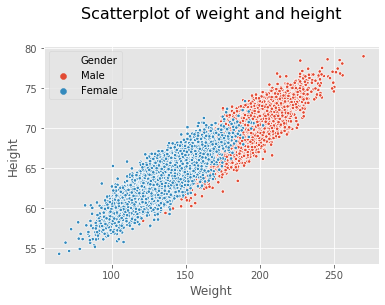

In [11]:
# Create scatterplot with points colored by gender

ax = sns.scatterplot(x='Weight', y='Height', hue='Gender', data=dflog, s=12)
plt.xlabel('Weight', fontsize = 12)
plt.ylabel('Height', fontsize = 12)
plt.title('Scatterplot of weight and height', y = 1.1, fontsize = 16)

## Step:  Split, fit and score models

### Example:  Split, fit and score basic model on all test data

In [12]:
# Import additional modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Split the data into a training and test set
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['Height','Weight']].values, 
                                              (dflog.Gender == "Male").values,random_state=5)

# Create model
clr = LogisticRegression(solver='lbfgs')


# Fit the model on the traing data.
clr.fit(Xlr, ylr)

# Print the accuracy from the testing data
# NOTE:  Predicting and scoring in same step
print(accuracy_score(clr.predict(Xtestlr), ytestlr))

0.9252


### Example:  Score data across folds, manually

In [13]:
# Import 

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Build a function to split, train and score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [14]:
# Create and score model using function

clf = LogisticRegression(solver='lbfgs')
score = cv_score(clf, Xlr, ylr)
print(score)

0.9172


## Exercise II:  Search for parameters

#### Q:  Tune parameters, manually

Implement the following search procedure to find a good model

* You are given a list of possible values of `C` below.  
* For each C:
    * Create a logistic regression model with that value of C
    * Find the average score for this model using the `cv_score` function **only on the training set** `(Xlr, ylr)`
* Pick the C with the highest average score.  
* Your goal is to find the best model parameters based *only* on the training set, without showing the model test set at all (which is why the test set is also called a *hold-out* set).

In [15]:
# List my possible parameter values
Cs = [0.001, 0.1, 1, 10, 100]

# Calc scores for each possible c value
score_list = []
for c in Cs:
    clr_2 = LogisticRegression(C=c, solver='lbfgs')
    score = cv_score(clr_2, Xlr, ylr)
    score_list.append(score)

# Make a dataframe
c_table = pd.DataFrame(score_list, index = Cs, columns = ['avg_score'])
c_table.index.name = 'c_value'

# Print the highest scores
print('The value of c with the highest score are:')
c_table[c_table['avg_score'] == c_table['avg_score'].max() ]
    

The value of c with the highest score are:


,avg_score
c_value,
0.1,0.9172
1.0,0.9172
10.0,0.9172
100.0,0.9172


Takeway:
    
* Most values have the same, highest score
* Does it matter which one you use?

## Exercise III:  Fit and score model on the test (aka, holdout) set

#### Q:  Estimate how this model will predict on unseen data

* Use the C you obtained from the procedure earlier and train a Logistic Regression on the training data
* Calculate the accuracy on the test data

In [16]:
# Create, fit and predict with new model

clr_3_c = .1
clr_3 = LogisticRegression(C=clr_3_c, solver='lbfgs')
clr_3.fit(Xlr, ylr)
clr_3_pred = clr_3.predict(Xtestlr)

# Score new model

clr_3_score = accuracy_score(clr_3_pred, ytestlr)
print('This accuracy of a model on test data with a C of {} is {}'.format(clr_3_c, clr_3_score))


This accuracy of a model on test data with a C of 0.1 is 0.9252


#### Questions

* You may notice that this particular value of `C` may or may not do as well as simply running the default model on a random train-test split.
* Do you think that's a problem? 
* Why do we need to do this whole cross-validation and grid search stuff anyway?

#### Answer:

* My value of C wasn't an improvement over the default model.
* Why?


## Exercise IV:  Use GridSearch for cross validation and scoring

#### Questions

* Use GridSearchCV to find the best model over the training set? 
* How does this model you've obtained perform on the test set?
* Does it give you the same best value of `C`?

In [17]:
# Import GridSearch
from sklearn.model_selection import GridSearchCV

# Create model, create grid, enable gridsearch, fit grid serach
clr_4 = LogisticRegression(solver='lbfgs')
param_grid = {'C': [0.001, 0.1, 1, 10, 100]}
clr_5 = GridSearchCV(clr_4, param_grid, cv=5)
clr_5.fit(Xlr, ylr)

# Get best parameters
print('This grid search found the best parameters to be {}'.format(clr_5.best_params_))

## Predict and score
clr_5_pred = clr_5.predict(Xtestlr)
clr_5_score = accuracy_score(clr_5_pred, ytestlr)

# Get accurary

print('This accuracy of a model with these parameters is {}'.format(clr_5_score))

This grid search found the best parameters to be {'C': 1}
This accuracy of a model with these parameters is 0.9252


Takeways:

* Yes, it gives me one of the multiple values of C that all were the best